In [54]:
import numpy as np 
import pandas as pd 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import time

In [55]:
crowdedness_df = pd.read_csv("./dataset/problem1.csv")
crowdedness_df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


- is_start_of_semester: true for the first two weeks of the semester
- timestamp: number of seconds that have elapsed in the day
- no_semester: semester free time in summer and winter

## Random forest algorithm
The random forest algorithm can be used to solve regression and classification problems. It operates by constructing a multitude of decision trees and merging them together to obtain a more stable and accurate prediction.

We are using Random Forest Algorithm:
* Results in a high prediction accuracy
* Works well with a big dataset
* Allows scalability

### EDA

Text(0.5, 1.0, 'Correlation between different fearures')

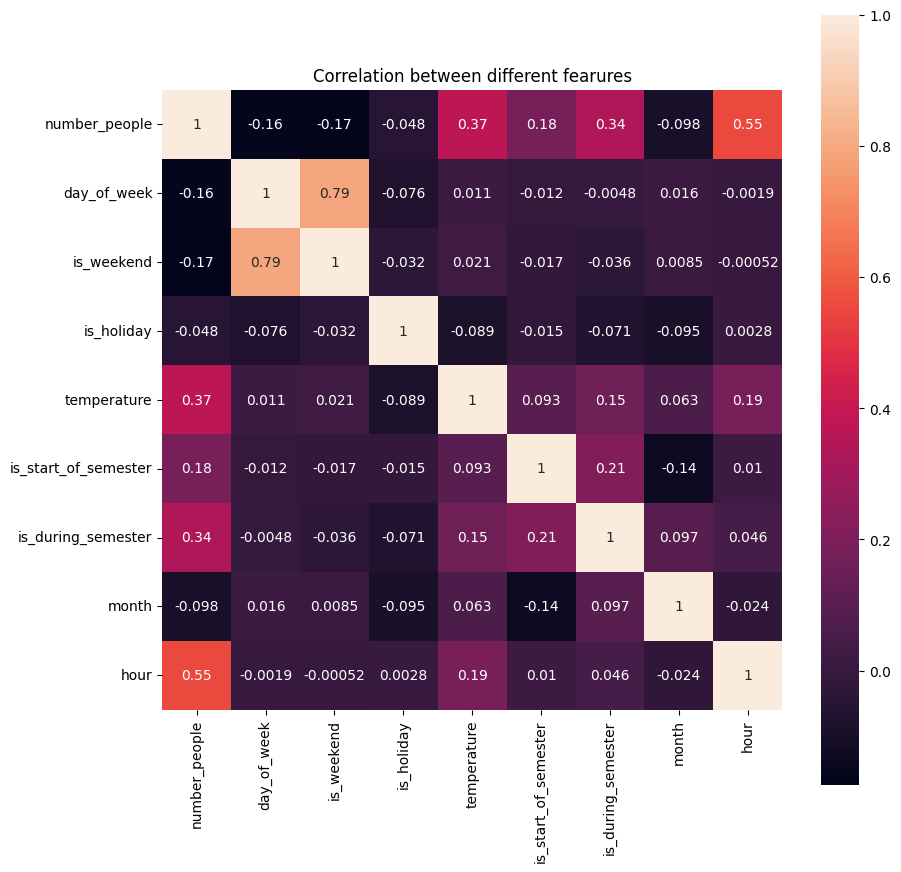

In [56]:
# First delete the date column
crowdedness_df = crowdedness_df.drop(['timestamp','date'], axis=1)
correlation = crowdedness_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True)
plt.title('Correlation between different fearures')

We can observe that timestamp and hour have 1 as correlation coefficient. Therefore we will delete the column of timestamp in order to keep only the most optimal features.

In [57]:
# Drop columns
columns = ["day_of_week", "month", "hour"]
# get_dumies is a function from pandas that converts categorical variable into dummy/indicator variables
df = pd.get_dummies(crowdedness_df, columns=columns)
df.head(10)

,number_people,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,37,0,0,71.76,0,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,45,0,0,71.76,0,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,40,0,0,71.76,0,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,44,0,0,71.76,0,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,45,0,0,71.76,0,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,46,0,0,72.15,0,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6,43,0,0,72.15,0,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
7,53,0,0,72.15,0,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
8,54,0,0,72.15,0,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9,43,0,0,72.15,0,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [58]:
# Extract the training and test data
data = df.values
X = data[:, 1:]  # all rows, no label
y = data[:, 0]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Here we splitted the dataset into 2 datasets : Training and testing.
As it is generally used, we splitted 75% of the data for the training and 25% for the testing.

In [59]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Here we are using 2 functions provided by the StandardScaler library : 
* Fit is used to compute the mean and std to be used for later scaling.
* Transform is used to perform standardization by centering and scaling.

In [60]:
# Establish model of random forest algorithm
model = RandomForestRegressor(n_jobs=-1)

# IV. Evaluation & Analysis

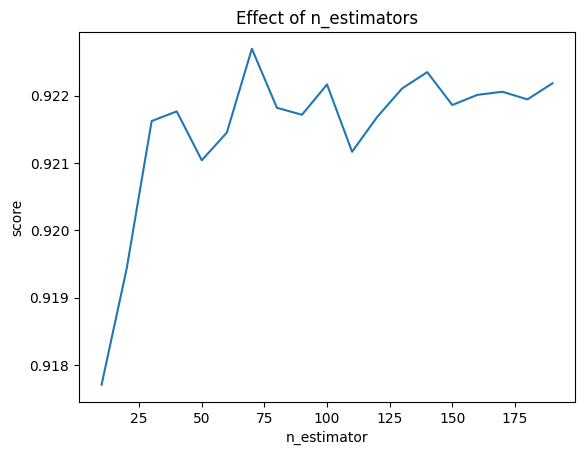

In [61]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
# Create an array of scores
scores = []

for n in estimators:
    model.set_params(n_estimators=n) # Choose the parameters
    model.fit(X_train, y_train) # Use the training datasets to build the forest of trees
    scores.append(model.score(X_test, y_test)) # Fill the array with predictions
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

First we define the n_estimators range in which we will evaluate the predictions (the estimators are actually the number of trees in the forest). Then we set the parameters of the random forest model and we created a forest of trees with the training dataset. After that we filled the scores array out with prediction scores. Finally we just display the graph of prediction scores according to the estimator range we've previously chosen.

As you can see, the graph shows us some high scores for different numbers of estimators between 20 and 200. The highest is the score, the more accurate are the predictions.

In [62]:
round(max(scores), 4)

0.9227

The highest score is 0.9222, which proves that our predictions are really good.
Using 130 estimators to get the highest score.

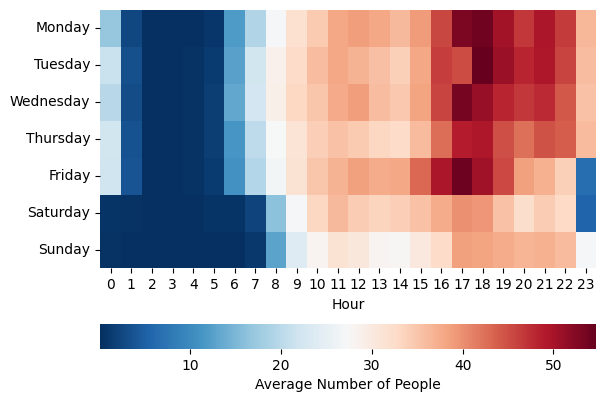

In [63]:
complete_crowdedness_df = pd.read_csv("./dataset/problem1.csv")

g = complete_crowdedness_df[['hour','number_people','day_of_week']] #dataframe with hour, number of people and the day of the week columns


F = (g.groupby(['hour', 'day_of_week'], as_index=False)
       .number_people.mean()
       .pivot(index='day_of_week', columns='hour', values='number_people')
       .fillna(0))


grid_kws = {"height_ratios": (.9, .05), "hspace": .3}

dow= 'Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split() #splitting the string


ax = sns.heatmap(F, cmap='RdBu_r',cbar_kws={"orientation": "horizontal"}) #cmap = Red/Blue, colorbar horizontal
ax.set_yticklabels(dow, rotation = 0) # axis labels
ax.set_ylabel('')
ax.set_xlabel('Hour')

cbar = ax.collections[0].colorbar
cbar.set_label('Average Number of People')

As we want to check what times are the busiest at the gym, a heatmap has been created. On this heatmap, we can identify that most people are going during the afternoon probably after class, between 4PM and 10PM, except on Friday because of the weekend.

We also don't see that much traffic in the morning as people don't want to get up that early, even if the heatmap clearly shows that it is the best time to go if you do not want to wait for equipment.

## Heatmap Year

In [64]:
def get_date(series):
    return series.str.slice(8,11) #get characters between 8th and 11th place

/var/folders/r0/ss55l5wd3hz4dn6m9d460d2c0000gn/T/ipykernel_14503/3686386176.py:2: FutureWarning: The provided callable <function mean at 0x1082f5620> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  month_date_count_df = pd.pivot_table(complete_crowdedness_df, columns=['day_of_month'],index=['month'], values='number_people', aggfunc=np.mean)


Text(0.5, 47.7222222222222, 'Day of week')

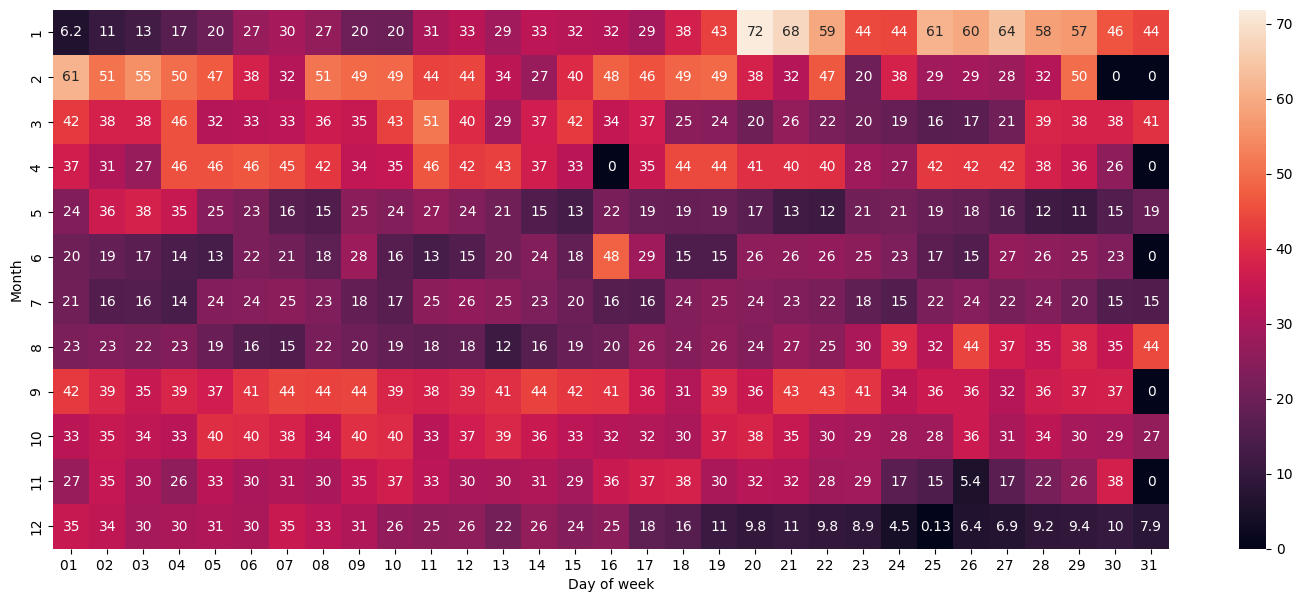

In [65]:
complete_crowdedness_df['day_of_month'] = complete_crowdedness_df[['date']].apply(get_date) 
month_date_count_df = pd.pivot_table(complete_crowdedness_df, columns=['day_of_month'],index=['month'], values='number_people', aggfunc=np.mean)
month_date_count_df.fillna(0, inplace=True)
fig, ax = plt.subplots(figsize=(18,7)) 
heatmap = sns.heatmap(month_date_count_df, annot=True, ax=ax)
heatmap.set_ylabel('Month')
heatmap.set_xlabel('Day of week')

We can see that at the start of the semester, the number of people at the gym is considerably increasing (end of January and August).

We can also clearly identify that the traffic is getting slower before holidays (probably due to exams) and is even worse during holidays (June to August and December to January). 